<a href="https://colab.research.google.com/github/Rishubh03/Microproject-ENT361-3/blob/main/ML_Micro_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hydroponic Nutrient Control System using machine learning

In [2]:
# Importing Basic Libraries 
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Pre-processing Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Evaluation Libraries
from sklearn.metrics import accuracy_score, precision_score

#Importing Dataset

In [3]:
data = pd.read_csv("/content/project_dataset.csv")

In [4]:
# view summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH      2700 non-null   float64
 1   EC      2700 non-null   float64
 2   TEMP    2700 non-null   float64
 3   LABEL   2700 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 84.5 KB


**Feature Description**

**PH:** pH of water (0 to 14).

**EC:** Electrical Conductivity of water (0 to 10 dS/m).

**TEMP** Temperature of Water (32 to 100 F).

In [5]:
# preview the dataset

data.head()

,PH,EC,TEMP,LABEL
0,5.79,2.23,63.05,1
1,5.62,2.38,59.56,1
2,5.93,3.85,65.44,1
3,5.61,3.57,78.36,1
4,6.36,3.74,69.44,1


In [6]:
# view dimensions of dataset

data.shape

(2700, 4)

In [7]:
data.describe()

,PH,EC,TEMP,LABEL
count,2700.000000,2700.000000,2700.000000,2700.000000
mean,6.020019,4.248696,67.023096,14.000000
std,1.570305,2.875982,19.973859,7.790324
min,3.000000,0.000000,32.000000,1.000000
25%,4.847500,1.687500,50.197500,7.000000
50%,6.030000,3.820000,66.745000,14.000000
75%,7.160000,6.650000,84.585000,21.000000
max,8.990000,10.000000,100.000000,27.000000


In [8]:
data['LABEL'].value_counts()

1     100
15    100
26    100
25    100
24    100
23    100
22    100
21    100
20    100
19    100
18    100
17    100
16    100
14    100
2     100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
27    100
Name: LABEL, dtype: int64

In [9]:
data.isnull().sum()

PH       0
EC       0
TEMP     0
LABEL    0
dtype: int64

In [10]:
Y = data['LABEL']

In [11]:
# drop LABEL column from dataset

X = data.drop(columns = "LABEL", axis= 1)

In [12]:
X.shape

(2700, 3)

#Split data into separate training and test set

In [13]:
# split X and y into training and testing sets

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state = 10, test_size = 0.3)

In [14]:
# view dimensions of Training and Testing dataset

xTrain.shape , xTest.shape

((1890, 3), (810, 3))

# Feature Scaling

In [15]:
# Feature Scaling

scaler = MinMaxScaler()

xTrain = scaler.fit_transform(xTrain)

xTest = scaler.fit_transform(xTest)

# Fit K-Nearest Neighbours Classifier to the training set

In [16]:
# instantiate the model

knn = KNeighborsClassifier(n_neighbors=8)

# fit the model to the training set

knn.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=8)

# Predict KNN test-set results

In [17]:
y_pred = knn.predict(xTest)

y_pred

array([ 3, 21, 24, 12, 12, 18,  9, 23,  5, 24,  4, 25,  2, 11,  2, 18,  6,
        8,  2, 19, 18, 22, 18, 10, 24,  5, 11, 23, 21, 15, 12, 16, 20, 16,
       20, 26,  4, 20,  8, 18,  7,  8, 23, 24, 26, 23, 25, 25,  3, 15,  1,
       26,  6,  1, 13, 12, 15, 22, 20,  9,  8,  4, 20,  8, 20,  8,  3,  4,
        6,  7, 15, 13,  7, 23, 10,  9, 10, 11, 11,  8, 11, 23, 21, 20,  1,
       16, 20,  3, 11,  4, 24, 27, 17, 27,  8,  3,  1, 12, 15, 17, 15, 18,
        9, 12, 20, 10, 10, 21, 23, 19, 23, 14, 18,  3,  8, 11,  8, 25,  5,
       10, 23,  8, 13,  2, 12, 14, 20, 20,  9,  1, 17, 22, 12,  7,  7, 16,
        2, 21,  3, 27, 16,  2, 25,  9,  8, 14,  6, 21,  5,  1,  8, 23,  5,
        3, 20, 11, 27, 11, 18, 27, 13, 21, 18, 22, 16, 12, 11, 26,  1, 16,
       11, 13, 15,  3,  2, 18,  2, 11,  7,  4, 19, 26, 16, 21,  7, 22, 17,
       25,  2, 16,  7, 21,  7, 15, 22,  2,  9, 20, 26,  3,  2, 10, 26, 18,
        9, 14,  4, 10,  7, 11,  3, 20,  9,  3,  5, 12,  7, 14, 10,  4, 21,
       19,  9,  1, 10,  5

# Check KNN accuracy score

In [18]:
training_data_accuracy = accuracy_score(y_pred, yTest)

In [19]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(yTest, y_pred)))

Model accuracy score: 0.8494


In [20]:
# Compare the train-set and test-set accuracy

y_pred_train = knn.predict(xTrain)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(yTrain, y_pred_train)))

Training-set accuracy score: 0.8968


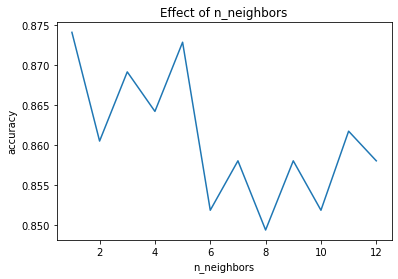

In [21]:
accuracyKNN =[]

neighbors = 13

for n in range(1,neighbors):
  knn.set_params(n_neighbors=n)
  knn.fit(xTrain,yTrain)
  y_pred=knn.predict(xTest)
  accuracyKNN.append(accuracy_score(yTest,y_pred))

neighbors = np.arange(1,13)
plt.title("Effect of n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.plot(neighbors,accuracyKNN);

# Fit Random Forest Classifier to the training set

In [22]:
# instantiate the model

rfc = RandomForestClassifier(n_estimators=20)

# fit the model to the training set

rfc.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=20)

# Predict Random Forest Classifier test-set results

In [23]:
y_pred=rfc.predict(xTest)

y_pred

array([ 3, 21, 22, 12, 12, 18,  9, 23,  5, 24,  4, 25,  2, 14,  2, 18,  6,
       20,  2, 19,  9, 24, 18, 11, 24,  5, 11, 23, 21, 15, 12, 16, 20, 16,
       20, 26,  4, 20,  8, 18,  7,  8, 23, 24, 26, 23, 25, 25,  3, 15,  2,
       26,  6, 19, 13, 12, 15, 24, 20,  9,  8,  4, 20,  8, 20,  8,  3,  4,
        6,  7, 15, 13,  9, 23, 10,  9, 10, 11, 11,  8, 11, 23, 24, 20,  1,
       16, 20,  3, 11, 25, 24, 27, 17, 27,  8, 21,  1, 12, 15, 17, 15, 18,
        9, 12, 20, 10, 10, 21, 23, 19, 23, 14, 18,  3, 26, 14,  8, 25,  5,
       13, 23,  8, 13, 20, 12, 14, 20, 20,  9,  1, 17, 22, 12,  7,  7, 18,
        2, 21,  3, 27, 16,  2, 25,  9,  8, 14,  6, 21, 14,  1, 26, 23,  5,
        3, 20, 14, 27, 11, 18, 27, 13, 21, 18, 22, 16, 12, 11, 26,  1, 16,
       11, 13, 15,  3, 11, 18,  2, 11,  7,  4, 19, 26, 16, 21,  7, 22, 17,
       25,  2, 18,  7, 21,  7, 15, 24,  2,  9, 20, 26,  3,  2, 10, 26, 18,
        9, 14,  4, 10, 26, 11,  3, 20,  9,  3, 14, 12,  7, 14, 10,  4, 21,
       19,  9,  1, 10, 14

# Check Random Classifier accuracy score

In [24]:
# Compare the train-set and test-set accuracy

from sklearn import metrics

print("Testing Accuracy:",metrics.accuracy_score(yTest,y_pred))

y_pred=rfc.predict(xTrain)

print("Training Accuracy:",metrics.accuracy_score(yTrain,y_pred))

Testing Accuracy: 0.9617283950617284
Training Accuracy: 1.0


In [25]:
estimators = np.arange(10,100,10)
accuracy =[]
for n in estimators:
  rfc.set_params(n_estimators=n)
  rfc.fit(xTrain,yTrain)
  y_pred=rfc.predict(xTest)
  accuracy.append(metrics.accuracy_score(yTest,y_pred))

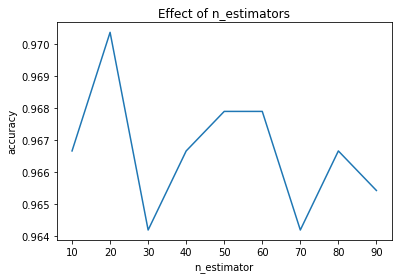

In [26]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators,accuracy)

# Support Vector Machine

In [27]:
# instantiate the model

svm = SVC(kernel='rbf', gamma=0.001, C=1000)

# fit the model to the training set

svm.fit(xTrain, yTrain)

SVC(C=1000, gamma=0.001)

# Fit Support vector Machine to the training set

In [29]:
Y_pred = svm.predict(xTrain)


print("Training set score for SVM: %f" % svm.score(xTrain , yTrain))
print("Testing  set score for SVM: %f" % svm.score(xTest, yTest ))

Training set score for SVM: 0.856085
Testing  set score for SVM: 0.843210


# Check Support vector machine accuracy score

In [30]:
estimators = np.arange(0.001,1,0.1)
accuracy =[]
for n in estimators:
  svm.set_params(gamma = n)
  svm.fit(xTrain,yTrain)
  y_pred=svm.predict(xTest)
  accuracy.append(metrics.accuracy_score(yTest,y_pred))

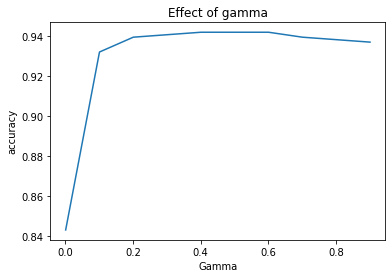

In [31]:
plt.title("Effect of gamma")
plt.xlabel("Gamma")
plt.ylabel("accuracy")
plt.plot(estimators,accuracy)

In [33]:
result = {
"1":"Chiller = off \nTDS = pump off \npH = pump off",
"2":"Chiller = on \n",
"3":"Chiller = off \n",
"4":"TDS down = pump on \n",
"5":"Chiller = on \nTDS down = pump on \n",
"6":"TDS down = pump on \n",
"7":"Nutrition ab = pump on \n",
"8":"Chiller = on \nNutrition ab = pump on \n",
"9":"Nutrition ab = pump on \n",
"10":"pH down = pump on \n",
"11":"Chiller = on \npH down = pump on",
"12":"pH down = pump on \n",
"13":"TDS down = pump on \npH down = pump on \n",
"14":"Chiller = on \nTDS down = pump on \npH down = pump on \n",
"15":"TDS down = pump on \npH down = pump on \n",
"16":"Nutrition ab = pump on \npH down = pump on \n",
"17":"Chiller = on \nNutrition ab = pump on \n",
"18":"Nutrition ab = pump on \npH down = pump on \n",
"19":"pH up = pump on \n",
"20":"Chiller = on \npH up = pump on \n",
"21":"pH up = pump on \n",
"22":"pH up = pump on \nTDS down = pump on \n",
"23":"Chiller = on \npH up = pump on \nTDS down pump on \n",
"24":"pH up = pump on \nTDS down = pump on \n",
"25":"pH up = pump on \nNutrition ab = pump on \n",
"26":"Chiller = on \npH up = pump on \nNutrition ab = pump on \n",
"27":"pH up = pump on \nNutrition ab = pump on \n",
}

In [34]:
pred = rfc.predict([[5.73,4.89,37.29]])
print(result[str(pred[0])])

Chiller = on 
TDS down = pump on 
pH down = pump on 

